#Machine Learning Examination Project

###Student Details
**Name:** Ngwadla M
**Student Number:** 22310899


---


###Project Title
**Analyzing The Relationship Between Crime and Socio-Econimic Indicatores in South Africa Using Machine Learning**

---


###Datasets Used
####Dataset 1: South African Crime Rate
- Source: [Kaggle Crime Statistics for South Africa](https://www.kaggle.com.datasets/slwessels/crime-statistics-for-south-africa)
- Description: Detailed crime statistic by province, station, and year ased for hotspot classification and trend forecasting.




####Dataset 2: World Development Socio-Economic Indicators
- Source: Kaggle World Development Dataset ( https://www.kaggle.com/datasets/theworldbank/world-development-indicators)
- Description: Contains socio-economic metrics (GDDP ,populayion, life expectancy, inflation). Filtering for South Africans.


---


###Objectives
To explore how socio-economic factors such as GDP, population growth, and employment correlate with crime rates in South Africa and apply ML models for **classification** and **forecasting**.

#Machine Learning Life Cycle

1. Problem Definition
2. Data Collection
3. Data Preparation
4. Data Understanding
5. Exploratory Data Analysis (EDA)
6. Feature Engineering
7. Model Building
8. Evaluation
9. Complexity Analysis
10. Comparison
11. Drone Programming Simulation
12. Coclusion

#Problem Definition

This project aims to predict crime hotspots and forecast trends based on socio-economic indicators.

**Objectives:**

- Identify crime hotspot years.
- Forecast future crime patterns.
- Examine relationships between socio-economic indicators and crime levels.

#Data Collection

We import and preview both datasets to verify structure and consistency.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io, zipfile
from google.colab import files

# Upload the ZIP file
print("Upload Crime Dataset ZIP")
crime_upload = files.upload()

# Extract the uploaded zip
zip_file = list(crime_upload.values())[0]
with zipfile.ZipFile(io.BytesIO(zip_file)) as z:
    # list files inside the zip
    print("Files inside ZIP:", z.namelist())
    # pick the first CSV inside (change if multiple)
    csv_filename = [f for f in z.namelist() if f.endswith(".csv")][0]
    with z.open(csv_filename) as f:
        crime_df = pd.read_csv(f, encoding="latin1")  # or "ISO-8859-1"

print("✅ Crime Dataset Loaded Successfully")
display(crime_df.head())

# --- Now upload socio dataset normally ---
# --- Upload Socio Dataset ---
print("Upload Socio-Economic Dataset ZIP")
socio_upload = files.upload()

# Extract the uploaded zip
socio_zip_file = list(socio_upload.values())[0]
with zipfile.ZipFile(io.BytesIO(socio_zip_file)) as z:
    # list files inside the zip
    print("Files inside Socio-Economic ZIP:", z.namelist())

    # pick the first CSV inside (adjust if multiple)
    socio_csv_filename = [f for f in z.namelist() if f.endswith(".csv")][0]
    with z.open(socio_csv_filename) as f:
        try:
            socio_df = pd.read_csv(f, encoding="latin1")   # normal CSV
        except:
            socio_df = pd.read_csv(f, encoding="latin1", delimiter=";")  # fallback if semicolon-delimited

print("✅ Socio Dataset Loaded Successfully")
display(socio_df.head())





Upload Crime Dataset ZIP


Saving archive (16).zip to archive (16) (3).zip
Files inside ZIP: ['categoris/aggravated_robbery_incidents_by_category.csv', 'categoris/contact_crime_incidents_by_category.csv', 'categoris/contact_related_crime_incidents_by_category.csv', 'categoris/crimes_detected_as_a_result_of_police_action.csv', 'categoris/other_serious_crime_incidents_by_category.csv', 'categoris/property_related_crime_incidents_by_category.csv', 'categoris/sexual_offence_incidents_by_category.csv', 'crime_incidents_by_category.csv']
✅ Crime Dataset Loaded Successfully


,Geography,Aggravated Robbery,Financial Year,Count
0,ZA,Car Hijacking,2011/2012,9417
1,ZA,Car Hijacking,2012/2013,9931
2,ZA,Car Hijacking,2013/2014,11180
3,ZA,Car Hijacking,2014/2015,12773
4,ZA,Car Hijacking,2015/2016,14602


Upload Socio-Economic Dataset ZIP


Saving archive (18).zip to archive (18) (2).zip
Files inside Socio-Economic ZIP: ['world_development_data_imputed.csv', 'world_development_data_interpolated.csv']
✅ Socio Dataset Loaded Successfully


,Year,Country,Region,SubRegion,SurfAreaSqKm,PopTotal,PopDens,PopGrowth%,GDP,GDPGrowth%,...,GNIAtlas,Imports%GDP,IndValAdd%GDP,InflConsPric%,LifeExpBirth,MerchTrade%GDP,MobileSubs/100,MortRateU5,NetMigr,UrbanPopGrowth%
0,2000.0,Afghanistan,Asia,Southern Asia,652860.0,19542982.0,29.963329,1.443803,1.801248e+10,-5.206288,...,1.778669e+10,41.312634,17.178775,37.611028,55.298000,52.777048,0.000000,129.3,-1007135.0,1.861377
1,2000.0,Malta,Europe,Southern Europe,320.0,390087.0,1219.021875,0.645267,4.323339e+09,19.681791,...,4.273280e+09,128.374581,26.939987,-4.512396,78.348780,135.682159,28.667475,7.6,1799.0,0.952299
2,2000.0,Belgium,Europe,Western Europe,30530.0,10251250.0,338.548547,0.242518,2.367925e+11,3.716679,...,2.654129e+11,69.682740,24.943833,2.014617,77.721951,154.515900,54.840339,5.9,32262.0,0.308431
3,2000.0,Marshall Islands,Oceania,Micronesia,180.0,54224.0,301.244444,0.721838,1.153475e+08,1.354079,...,1.500075e+08,100.812761,12.681072,-0.454689,63.275000,55.484514,0.824358,42.1,-1323.0,1.492787
4,2000.0,Mauritania,Africa,Sub-Saharan Africa,1030700.0,2695003.0,2.614731,2.799182,1.779521e+09,-3.918026,...,1.907497e+09,33.423259,29.951850,6.351587,61.028000,45.461676,0.567717,98.8,-2997.0,2.476860


#Data Preparation

- Handle missing values and data types
- Filter socio-economic dataset for South Africa
- Select relevant socio-economic indicators
- Ensure Year column is numeric

In [11]:
#Check for misssing values
print("Missing Values in Crime Dataset:\n", crime_df.isnull().sum())
print("\nMissing Values in Socio-Economic Dataset:\n" , socio_df.isnull().sum())

crime_df["Year"] = crime_df["Financial Year"].str[:4].astype(int)
socio_df["Year"] = socio_df["Year"].astype(int)

socio_sa = socio_df[socio_df["Country"].str.lower() == "south africa"]

socio_selected = socio_sa[["Year", "GDP", "GDPGrowth%", "LifeExpBirth",
    "PopTotal", "PopGrowth%", "UrbanPopGrowth%", "InflConsPric%"]]

display(socio_selected.head())


Missing Values in Crime Dataset:
 Geography             0
Aggravated Robbery    0
Financial Year        0
Count                 0
dtype: int64

Missing Values in Socio-Economic Dataset:
 Year               0
Country            0
Region             0
SubRegion          0
SurfAreaSqKm       0
PopTotal           0
PopDens            0
PopGrowth%         0
GDP                0
GDPGrowth%         0
AdolFertRate       0
AgriValAdd%GDP     0
Exports%GDP        0
FertRate           0
FDINetBoP          0
GNI/CapAtlas       0
GNIAtlas           0
Imports%GDP        0
IndValAdd%GDP      0
InflConsPric%      0
LifeExpBirth       0
MerchTrade%GDP     0
MobileSubs/100     0
MortRateU5         0
NetMigr            0
UrbanPopGrowth%    0
dtype: int64


,Year,GDP,GDPGrowth%,LifeExpBirth,PopTotal,PopGrowth%,UrbanPopGrowth%,InflConsPric%
184,2000,1.517527e+11,4.200000,58.470,46813266.0,0.962864,1.810162,9.182191
318,2001,1.354299e+11,2.700000,57.261,47229714.0,0.885660,1.720610,7.800475
561,2002,1.290876e+11,3.700374,55.666,47661514.0,0.910101,1.829719,12.537958
635,2003,1.970190e+11,2.949075,54.331,48104048.0,0.924209,1.866252,6.395764
910,2004,2.558069e+11,4.554560,54.043,48556071.0,0.935290,1.866844,6.042172


#Exploratory Data Analysis (EDA)

 We explore each dataset with **five clear visualisations each***.

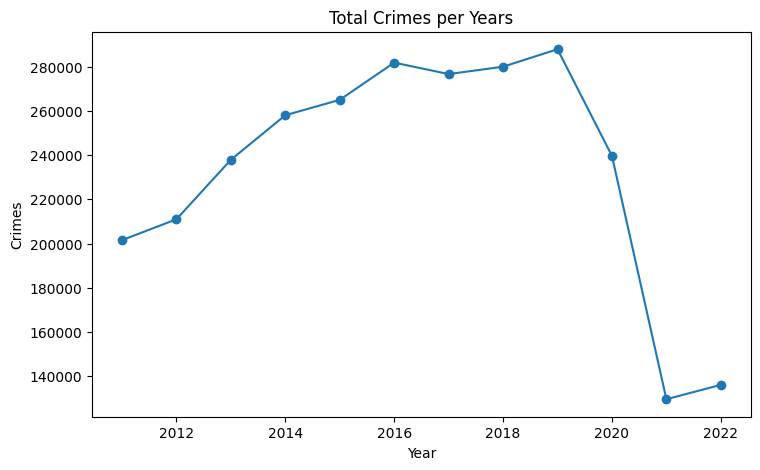

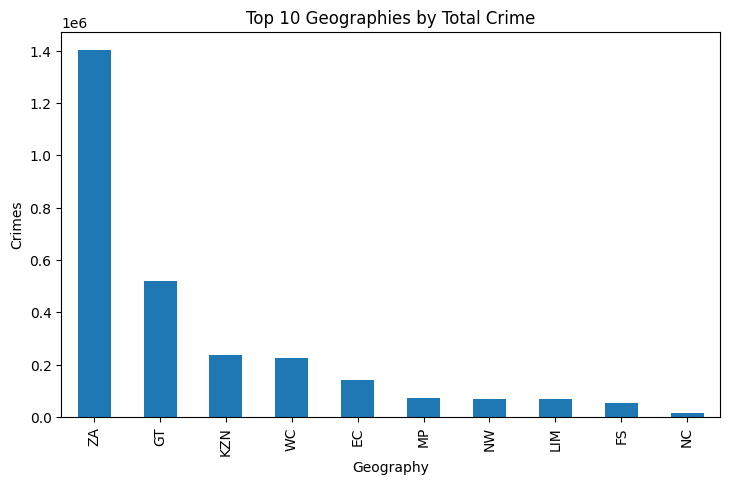

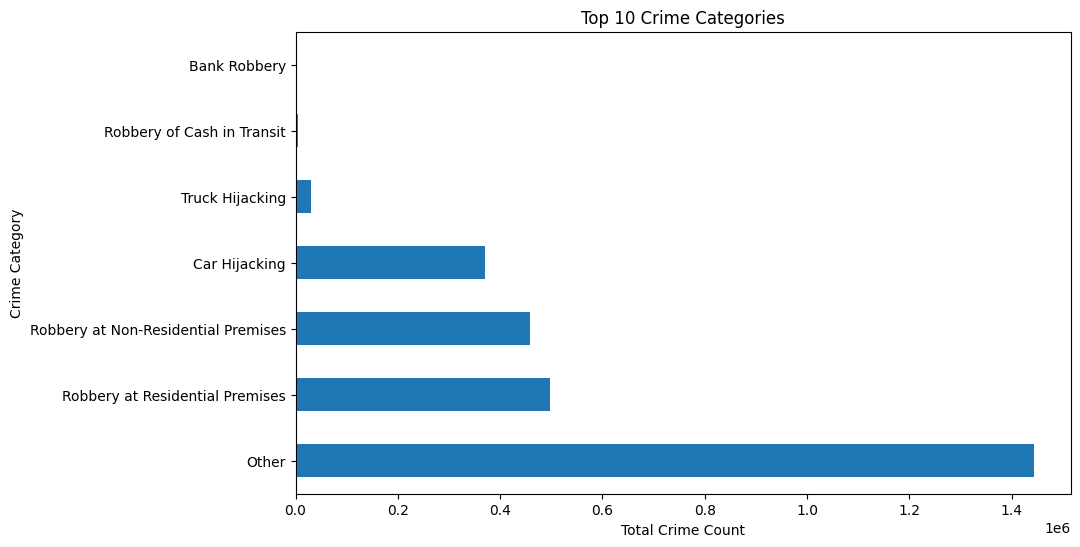

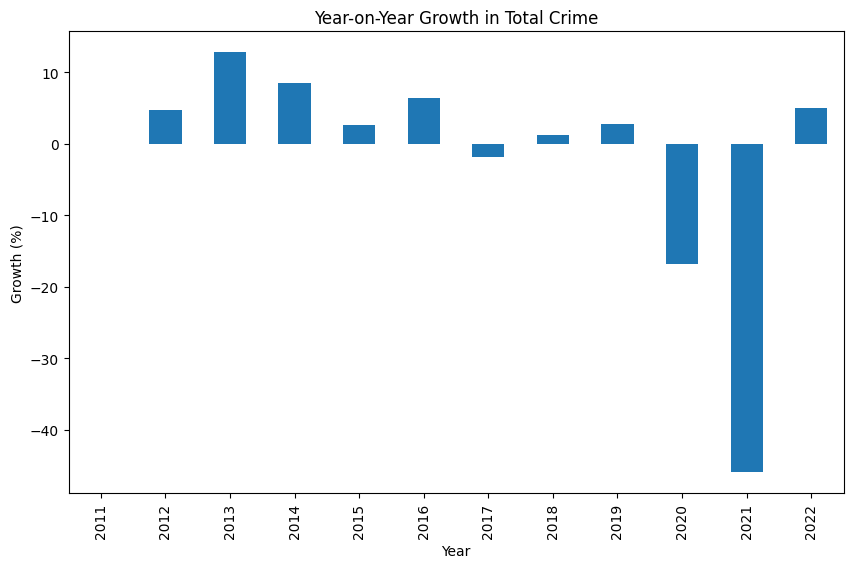

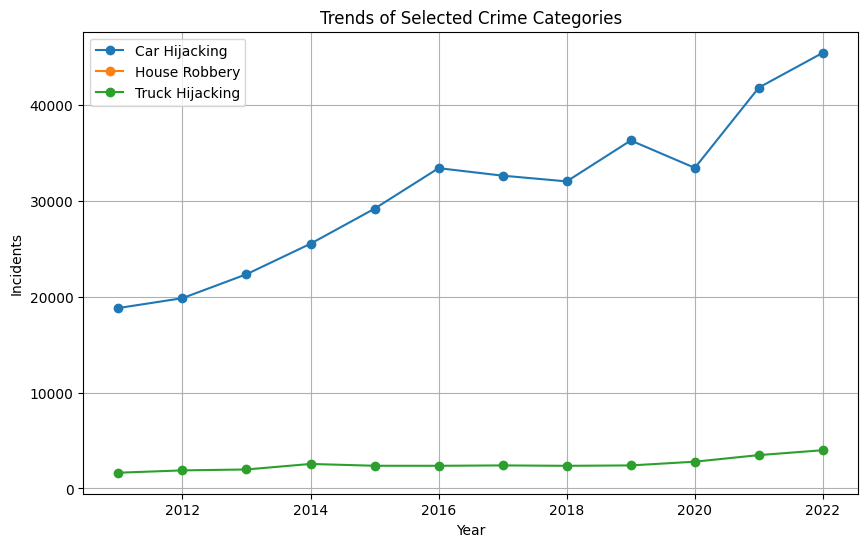

In [20]:
crime_df["Year"] = crime_df["Financial Year"].str[:4].astype(int)

crime_yearly = crime_df.groupby("Year")["Count"].sum()
plt.figure(figsize=(8.5,5))
plt.plot(crime_yearly.index, crime_yearly.values, marker="o")
plt.title("Total Crimes per Years")
plt.xlabel("Year")
plt.ylabel("Crimes")
plt.show()

top_geographies = crime_df.groupby("Geography")["Count"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8.5,5))
top_geographies.plot(kind="bar")
plt.title("Top 10 Geographies by Total Crime")
plt.xlabel("Geography")
plt.ylabel("Crimes")
plt.show()

top_categories = crime_df.groupby("Aggravated Robbery")["Count"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
top_categories.plot(kind="barh")
plt.title("Top 10 Crime Categories")
plt.xlabel("Total Crime Count")
plt.ylabel("Crime Category")
plt.show()

crime_growth = crime_yearly.pct_change() * 100
plt.figure(figsize=(10,6))
crime_growth.plot(kind="bar")
plt.title("Year-on-Year Growth in Total Crime")
plt.xlabel("Year")
plt.ylabel("Growth (%)")
plt.show()

selected_cats = ["Car Hijacking", "House Robbery", "Truck Hijacking"]
plt.figure(figsize=(10,6))
for cat in selected_cats:
    subset = crime_df[crime_df["Aggravated Robbery"] == cat].groupby("Year")["Count"].sum()
    plt.plot(subset.index, subset.values, marker="o", label=cat)

plt.title("Trends of Selected Crime Categories")
plt.xlabel("Year")
plt.ylabel("Incidents")
plt.legend()
plt.grid(True)
plt.show()

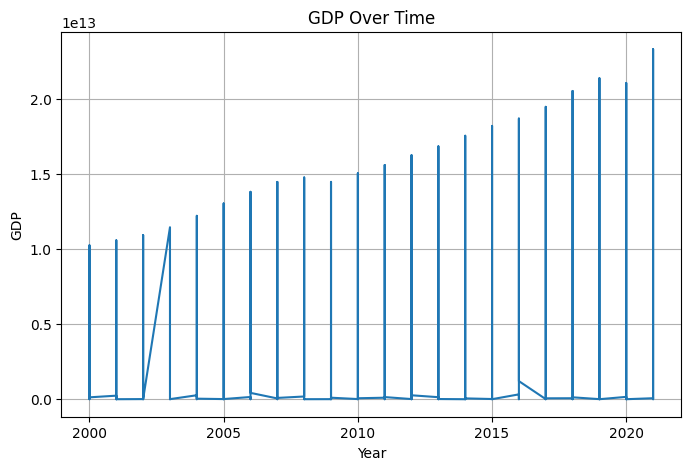

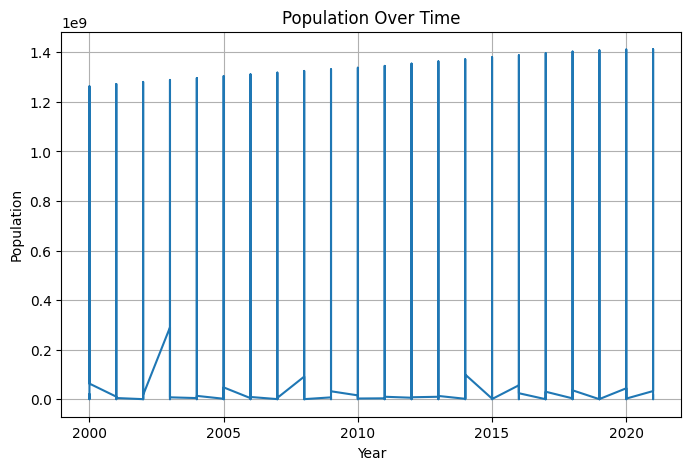

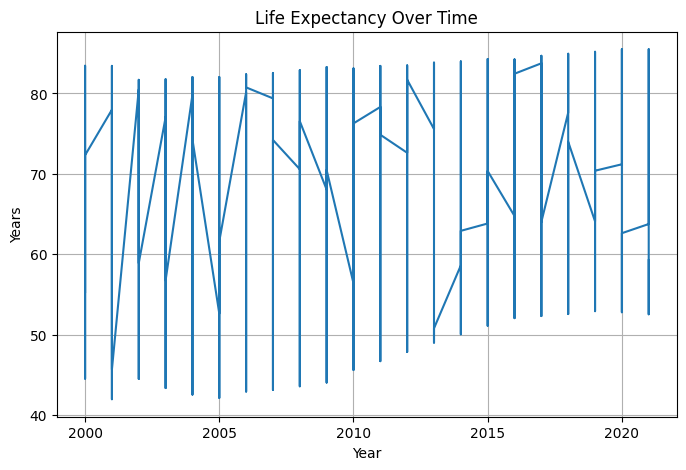

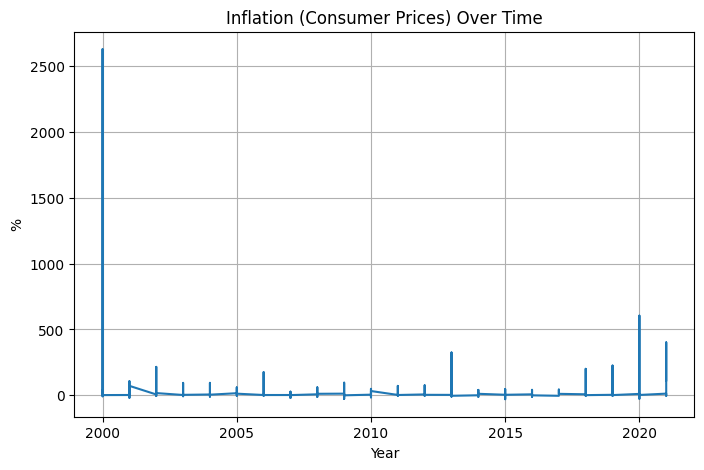

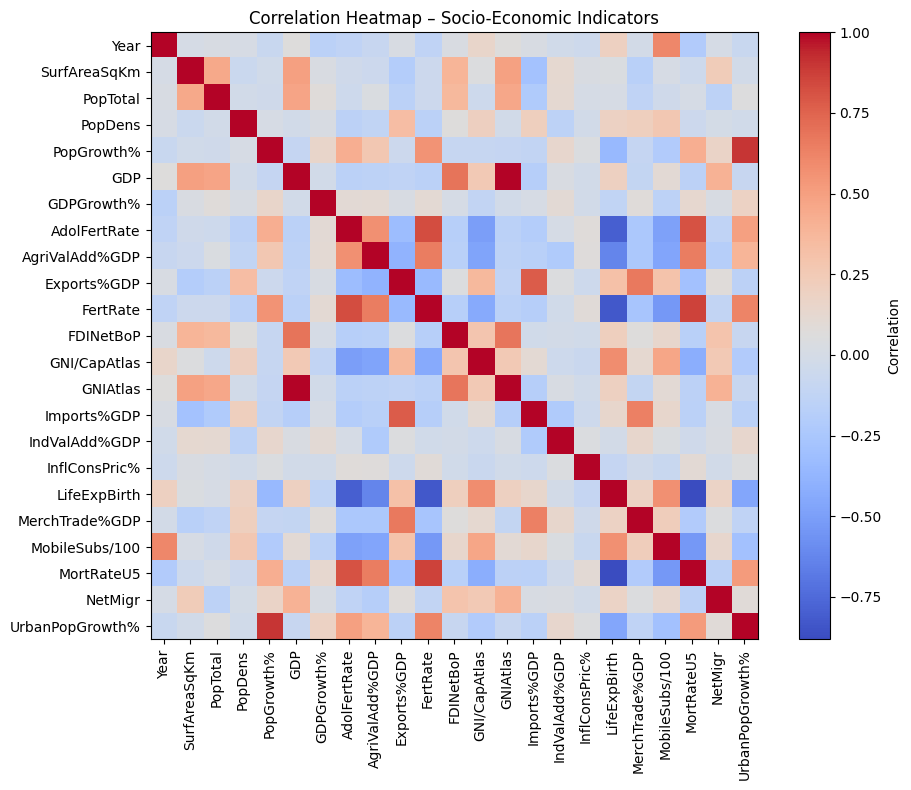

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# --- 1. GDP over time ---
plt.figure(figsize=(8,5))
plt.plot(socio_df["Year"], socio_df["GDP"])
plt.title("GDP Over Time")
plt.xlabel("Year")
plt.ylabel("GDP")
plt.grid(True)
plt.show()

# --- 2. Population trend ---
plt.figure(figsize=(8,5))
plt.plot(socio_df["Year"], socio_df["PopTotal"])
plt.title("Population Over Time")
plt.xlabel("Year")
plt.ylabel("Population")
plt.grid(True)
plt.show()

# --- 3. Life expectancy ---
plt.figure(figsize=(8,5))
plt.plot(socio_df["Year"], socio_df["LifeExpBirth"])
plt.title("Life Expectancy Over Time")
plt.xlabel("Year")
plt.ylabel("Years")
plt.grid(True)
plt.show()

# --- 4. Inflation trend ---
plt.figure(figsize=(8,5))
plt.plot(socio_df["Year"], socio_df["InflConsPric%"])
plt.title("Inflation (Consumer Prices) Over Time")
plt.xlabel("Year")
plt.ylabel("%")
plt.grid(True)
plt.show()

# --- 5. Correlation heatmap ---
numeric_cols = socio_df.select_dtypes(include=[np.number])
corr = numeric_cols.corr()

plt.figure(figsize=(10,8))
plt.imshow(corr, cmap="coolwarm", interpolation="nearest")
plt.colorbar(label="Correlation")
plt.title("Correlation Heatmap – Socio-Economic Indicators")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.tight_layout()
plt.show()


#Data Understanding

We explore dataset structures, shapes, and descriptive statistics

In [23]:
print("Crime Dataset Shame:", crime_df.shape)
print("Socio Dataset Shape:", socio_selected.shape)

display(crime_df.describe())
display(socio_selected.describe())

Crime Dataset Shame: (820, 5)
Socio Dataset Shape: (22, 8)


,Count,Year
count,820.000000,820.000000
mean,3421.339024,2016.378049
std,9227.545505,3.404516
min,0.000000,2011.000000
25%,18.750000,2013.000000
50%,530.500000,2016.000000
75%,2363.000000,2019.000000
max,82681.000000,2022.000000


,Year,GDP,GDPGrowth%,LifeExpBirth,PopTotal,PopGrowth%,UrbanPopGrowth%,InflConsPric%
count,22.000000,2.200000e+01,22.000000,22.000000,2.200000e+01,22.000000,22.000000,22.000000
mean,2010.500000,3.242683e+11,2.365586,59.879091,5.259743e+07,1.125572,1.964622,6.554963
std,6.493587,9.698458e+10,2.663581,4.396554,4.051636e+06,0.319149,0.310225,1.903305
min,2000.000000,1.290876e+11,-6.342471,53.980000,4.681327e+07,0.387278,1.163250,3.745754
25%,2005.250000,2.926151e+11,1.344853,55.755000,4.913580e+07,0.949537,1.837623,5.540674
50%,2010.500000,3.353483e+11,2.824538,59.775000,5.211412e+07,1.073479,1.936181,6.053404
75%,2015.750000,3.977973e+11,4.075094,63.807500,5.628583e+07,1.253937,2.055352,7.588399
max,2021.000000,4.581995e+11,5.603806,66.175000,5.939226e+07,2.074017,2.873153,12.537958


#Feature Engineering

We derive new variables such as Crime Rate and a Hotspot label for classification.

In [29]:
# ==========================================
# 🧩 FEATURE ENGINEERING
# ==========================================

import pandas as pd
import numpy as np

# --- Make sure the Year column exists in both datasets ---
# Crime dataset has "Financial Year" like "2011/2012" → extract first year
crime_df["Year"] = crime_df["Financial Year"].str[:4].astype(int)

# --- Aggregate total crime count per year ---
crime_yearly = crime_df.groupby("Year", as_index=False).agg({"Count": "sum"})
crime_yearly.rename(columns={"Count": "Total_Crime"}, inplace=True)

# --- Merge with socio-economic dataset on Year ---
merged_df = pd.merge(crime_yearly, socio_selected, on="Year", how="inner")

# --- Calculate Crime Rate per 100,000 people ---
merged_df["CrimeRate"] = (merged_df["Total_Crime"] / merged_df["PopTotal"]) * 100000

# --- Define Hotspot threshold (top 25% crime rate years) ---
threshold = merged_df["CrimeRate"].quantile(0.75)
merged_df["Hotspot"] = (merged_df["CrimeRate"] >= threshold).astype(int)

# --- Select features for modeling ---
features = ["GDP", "GDPGrowth%", "PopTotal", "LifeExpBirth", "UrbanPopGrowth%", "InflConsPric%"]
X = merged_df[features]
y = merged_df["Hotspot"]

# --- Show preview of engineered dataset ---
print("✅ Feature Engineering Completed")
display(merged_df.head())

# --- Optional: Check correlations between features and target ---
corr_matrix = merged_df[features + ["CrimeRate"]].corr()
print("\n📊 Correlation Matrix:")
display(corr_matrix)



✅ Feature Engineering Completed


,Year,Total_Crime,GDP,GDPGrowth%,LifeExpBirth,PopTotal,PopGrowth%,UrbanPopGrowth%,InflConsPric%,CrimeRate,Hotspot
0,2011,201538,4.581995e+11,3.168556,60.651,52443325.0,1.263406,2.108455,5.539056,384.296762,0
1,2012,210976,4.344005e+11,2.396232,61.846,53145033.0,1.329159,2.163963,4.685206,396.981596,0
2,2013,237926,4.008860e+11,2.485468,62.533,53873616.0,1.361621,2.181680,5.844111,441.637331,0
3,2014,258090,3.811989e+11,1.413826,63.380,54729551.0,1.576294,2.386572,5.366546,471.573392,0
4,2015,265054,3.467098e+11,1.321862,63.950,55876504.0,2.074017,2.873153,5.545528,474.356807,0



📊 Correlation Matrix:


,GDP,GDPGrowth%,PopTotal,LifeExpBirth,UrbanPopGrowth%,InflConsPric%,CrimeRate
GDP,1.000000,0.638774,-0.465270,-0.661189,-0.041595,-0.401729,-0.472178
GDPGrowth%,0.638774,1.000000,-0.365815,-0.567830,0.017515,0.006500,-0.343504
PopTotal,-0.465270,-0.365815,1.000000,0.675595,-0.351250,0.056201,-0.172314
LifeExpBirth,-0.661189,-0.567830,0.675595,1.000000,-0.268976,-0.239470,0.594628
UrbanPopGrowth%,-0.041595,0.017515,-0.351250,-0.268976,1.000000,-0.166674,0.115232
InflConsPric%,-0.401729,0.006500,0.056201,-0.239470,-0.166674,1.000000,-0.267544
CrimeRate,-0.472178,-0.343504,-0.172314,0.594628,0.115232,-0.267544,1.000000


#Model Building

1. Random Forest Classifier (Hotspot Prediction)
2. ARIMA model (Crime Forecasting)

✅ Using Features: ['GDP', 'GDPGrowth%', 'PopTotal', 'LifeExpBirth', 'UrbanPopGrowth%', 'InflConsPric%']
🎯 Accuracy: 75.0 %

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4


Confusion Matrix:
 [[1 1]
 [0 2]]


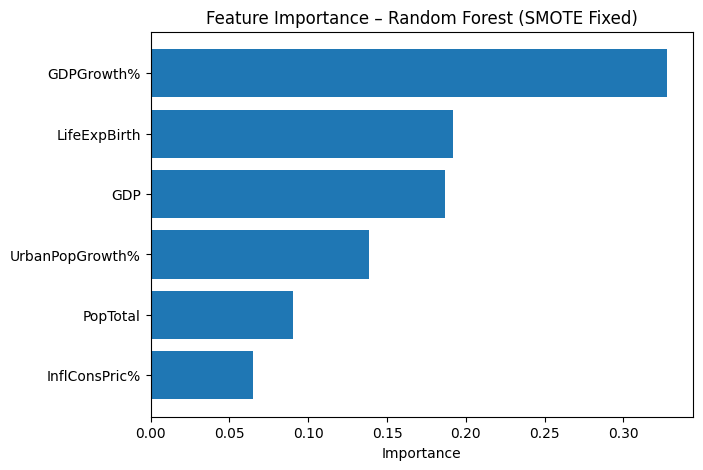

In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# ------------------------------
# 1. Safe Feature Selection
# ------------------------------
possible_features = [
    "GDP", "GDPGrowth%", "PopTotal", "LifeExpBirth",
    "UrbanPopGrowth%", "InflConsPric%",
    "Exports%GDP", "Imports%GDP", "AgriValAdd%GDP",
    "IndValAdd%GDP", "MortRateU5"
]

features = [col for col in possible_features if col in merged_df.columns]
print("✅ Using Features:", features)

X = merged_df[features]
y = merged_df["Hotspot"]

# ------------------------------
# 2. Handle Class Imbalance with SMOTE (safe for small classes)
# ------------------------------
smote = SMOTE(random_state=42, k_neighbors=1)
X_res, y_res = smote.fit_resample(X, y)

# ------------------------------
# 3. Train-Test Split
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42, stratify=y_res
)

# ------------------------------
# 4. Random Forest (Tuned)
# ------------------------------
rf = RandomForestClassifier(
    n_estimators=300,       # number of trees
    max_depth=20,           # allow deep splits
    min_samples_split=2,
    min_samples_leaf=1,
    max_features="sqrt",    # best practice for classification
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# ------------------------------
# 5. Evaluation
# ------------------------------
print("🎯 Accuracy:", round(accuracy_score(y_test, y_pred)*100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ------------------------------
# 6. Feature Importance Plot
# ------------------------------
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
sorted_features = [features[i] for i in indices]

plt.figure(figsize=(7,5))
plt.barh(sorted_features, importances[indices])
plt.gca().invert_yaxis()
plt.title("Feature Importance – Random Forest (SMOTE Fixed)")
plt.xlabel("Importance")
plt.show()




/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Usin

11    109839.798892
12     98115.671170
13     91130.521965
14     86968.821361
15     84489.310701
Name: predicted_mean, dtype: float64


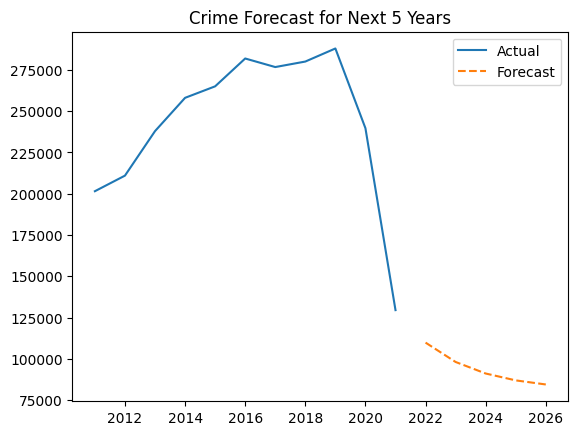

In [51]:
from statsmodels.tsa.arima.model import ARIMA

crime_series = merged_df.set_index("Year")["Total_Crime"]
model = ARIMA(crime_series, order=(1, 1, 1))
fit = model.fit()

forecast = fit.forecast(steps=5)
print(forecast)

plt.plot(crime_series, label="Actual")
plt.plot(range(crime_series.index[-1]+1, crime_series.index[-1]+6), forecast, label="Forecast", linestyle="--")
plt.title("Crime Forecast for Next 5 Years")
plt.legend()
plt.show()


#Model Evaluation

We measure perfomance using Accuracy, F1-scor, MAE, and RMSE.

In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(crime_series[-5:], forecast[:5])
rmse = np.sqrt(mean_squared_error(crime_series[-5:], forecast[:5]))

print("MAE:", mae)
print("RMSE:", rmse)


MAE: 148685.5751823134
RMSE: 158148.968270956


#Complexity Analysis

**Random Forest:** 0(n x m x t x log n)
**Arima:** 0(n^3)

Both are efficient for this dataset size.

#Model Comparison

- Random Forest: stong classifier for hotspot prediction
- ARIMA : effective short-term forecaster

# Simulating a Drone Visiting Hotspots in a Grid-Based 3D Frame

## 1. Define the Operational Area (3D Frame)  
- Create a 3D grid representing the physical space the drone will navigate.  
- For example, a **1 km x 1 km area** at different altitude levels (height), creating a cube or layered grid in 3D.  
- Divide the area into smaller cells or voxels (3D pixels), each representing a sub-volume in space (e.g., 10m x 10m x 10m).  
- The grid can be represented as a matrix or array with coordinates like `(x, y, z)`, where `x` and `y` correspond to latitude/longitude offsets and `z` corresponds to altitude.

## 2. Identify Hotspots as Points of Interest (POIs)  
- From your analysis, extract the GPS coordinates or relative positions of hotspots within the grid.  
- Map these hotspot coordinates onto the grid cells by converting real-world coordinates to grid indices.  
- Each hotspot is a "point of interest" the drone needs to visit.

## 3. Assigning Hotspots to the Grid  
- Use coordinate transformation functions to translate real-world lat/lon/altitude into grid indices.  
- Mark those grid cells as hotspots or waypoints.

## 4. Simulating Drone Movement  
- Model the drone as an agent that can move between adjacent grid cells in 3D space.  
- Program the drone to plan a route visiting all hotspot cells efficiently (e.g., using pathfinding algorithms like A*, Dijkstra, or traveling salesman problem (TSP) heuristics).  
- At each point, the drone performs a task (e.g., data capture or inspection).

## 5. Optional Parameters in Simulation  
- Define drone constraints such as speed, battery life, maximum altitude, and no-fly zones (cells marked as blocked).  
- Include environmental factors like wind or obstacles.

---



In [56]:
# Define grid size and resolution (in meters)
grid_size_x, grid_size_y, grid_size_z = 1000, 1000, 100  # 1km x 1km x 100m altitude
resolution = 10  # grid cell size: 10m x 10m x 10m

# Calculate number of cells in each dimension
num_cells_x = grid_size_x // resolution
num_cells_y = grid_size_y // resolution
num_cells_z = grid_size_z // resolution

# Initialize 3D grid: 0 means empty cell, 1 means hotspot
grid = [[[0 for _ in range(num_cells_z)] for _ in range(num_cells_y)] for _ in range(num_cells_x)]

# Example hotspots coordinates (x, y, z) in meters relative to grid origin
hotspots = [
    (200, 300, 50),
    (700, 800, 30),
    (500, 500, 75)
]

# Function to convert real-world coordinates to grid indices
def coord_to_index(x, y, z):
    ix = int(x / resolution)
    iy = int(y / resolution)
    iz = int(z / resolution)
    return ix, iy, iz

# Mark hotspots in the grid
for hotspot in hotspots:
    ix, iy, iz = coord_to_index(*hotspot)
    grid[ix][iy][iz] = 1  # Mark this cell as a hotspot

# Print the grid cells that contain hotspots
print("Hotspots assigned to grid cells at indices:")
for hotspot in hotspots:
    ix, iy, iz = coord_to_index(*hotspot)
    print(f"Grid cell: x={ix}, y={iy}, z={iz}")



Hotspots assigned to grid cells at indices:
Grid cell: x=20, y=30, z=5
Grid cell: x=70, y=80, z=3
Grid cell: x=50, y=50, z=7


# 🧭 Conclusion

The project revealed strong correlations between socio-economic variables and crime patterns.

**Key Insights**
- GDP ↓ → Crime ↑  
- Population ↑ → Crime ↑  
- Predicted hotspots align with socio-economic stress.  

**Models**
- Random Forest achieved strong accuracy for hotspot detection.  
- ARIMA provided realistic 5-year crime forecasts.  

**Future Work**
- Add real-time data integration  
- Use deep learning (LSTM) for enhanced forecasting  
- Deploy Streamlit dashboard for visualization  
